# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy import stats
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

weather_api_key

'f96790f3ee394b4a6f0d66eea4020424'

### Generate the Cities List by Using the `citipy` Library

In [66]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


In [67]:
cities

['bredasdorp',
 'ust-nera',
 'carnarvon',
 'jamestown',
 'ponta delgada',
 'praia da vitoria',
 'green river',
 'port-aux-francais',
 'labytnangi',
 'yuzhno-kurilsk',
 'port blair',
 'rongelap',
 'sighisoara',
 'puerto natales',
 'georgetown',
 'canada de gomez',
 'blackmans bay',
 'puerto ayora',
 'bulgan',
 'waitangi',
 'tiksi',
 'bethel',
 'enshi',
 'sanctuary point',
 'alta',
 'bilibino',
 'salekhard',
 'alamos',
 'ujae',
 'yellowknife',
 'luganville',
 'port mathurin',
 'grand falls-windsor',
 'babana',
 'taiohae',
 'namibe',
 'shenjiamen',
 'whitehorse',
 'homer',
 'enewetak',
 'grytviken',
 'christchurch',
 "st. john's",
 'paphos',
 'charters towers',
 'alice springs',
 'manokwari',
 'mount isa',
 'tarko-sale',
 'nicoya',
 'west island',
 'joshimath',
 'longyearbyen',
 'sogndal',
 'puerto baquerizo moreno',
 "'ohonua",
 'kodiak',
 'constantia',
 'obala',
 'port augusta',
 'margaret river',
 'gadzhiyevo',
 'adamstown',
 'kataragama',
 'thompson',
 'lebu',
 'qaqortoq',
 'ushuaia',

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [68]:
# Set the API base URL
url =  "http://api.openweathermap.org/data/2.5/weather?units=metric&appid=" + weather_api_key
units = "metric"

# Build query URL

# Define an empty list to fetch the weather data for each city
city_data = []


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    query_url = url + "&q=" + city 
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    record_count +=1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url).json()
        
#        print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date

        city_lat= city_weather['coord']['lat']
        city_lng= city_weather['coord']['lon']
        city_max_temp= city_weather['main']['temp_max']
        city_humidity= city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date= city_weather['dt']
        
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                         "Lat": city_lat, 
                         "Lng": city_lng, 
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bredasdorp
Processing Record 2 of Set 1 | ust-nera
Processing Record 3 of Set 1 | carnarvon
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | ponta delgada
Processing Record 6 of Set 1 | praia da vitoria
Processing Record 7 of Set 1 | green river
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | labytnangi
Processing Record 10 of Set 1 | yuzhno-kurilsk
Processing Record 11 of Set 1 | port blair
Processing Record 12 of Set 1 | rongelap
Processing Record 13 of Set 1 | sighisoara
City not found. Skipping...
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | georgetown
Processing Record 16 of Set 1 | canada de gomez
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | bulgan
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | tiksi


Processing Record 38 of Set 4 | dzilam gonzalez
Processing Record 39 of Set 4 | ghat
Processing Record 40 of Set 4 | bayan nur
City not found. Skipping...
Processing Record 41 of Set 4 | diffa
Processing Record 42 of Set 4 | afaahiti
Processing Record 43 of Set 4 | iskateley
Processing Record 44 of Set 4 | cienfuegos
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | blenheim
Processing Record 47 of Set 4 | arraial do cabo
Processing Record 48 of Set 4 | liwale
Processing Record 49 of Set 4 | hithadhoo
Processing Record 0 of Set 5 | kilindoni
Processing Record 1 of Set 5 | nuuk
Processing Record 2 of Set 5 | ash shafa
City not found. Skipping...
Processing Record 3 of Set 5 | chonchi
Processing Record 4 of Set 5 | college
Processing Record 5 of Set 5 | shemysheyka
Processing Record 6 of Set 5 | upington
Processing Record 7 of Set 5 | kidal
Processing Record 8 of Set 5 | hermanus
Processing Record 9 of Set 5 | san antonio de pale
Processing Record 10 of Set 5 | vorgasho

Processing Record 26 of Set 8 | palmer
Processing Record 27 of Set 8 | guarapari
Processing Record 28 of Set 8 | faya-largeau
Processing Record 29 of Set 8 | boiling springs
Processing Record 30 of Set 8 | kuroishi
Processing Record 31 of Set 8 | guangming
Processing Record 32 of Set 8 | brezina
Processing Record 33 of Set 8 | imbituba
Processing Record 34 of Set 8 | kalmunai
Processing Record 35 of Set 8 | jijiga
Processing Record 36 of Set 8 | fort saskatchewan
Processing Record 37 of Set 8 | la ronge
Processing Record 38 of Set 8 | tralee
Processing Record 39 of Set 8 | alliance
Processing Record 40 of Set 8 | isangel
Processing Record 41 of Set 8 | qal'at bishah
City not found. Skipping...
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | barra de santo antonio
Processing Record 44 of Set 8 | fortaleza
Processing Record 45 of Set 8 | canon city
Processing Record 46 of Set 8 | east london
Processing Record 47 of Set 8 | murudeshwara
Processing Record 48 of Set 

Processing Record 19 of Set 12 | lombardia
Processing Record 20 of Set 12 | chopda
Processing Record 21 of Set 12 | pitimbu
Processing Record 22 of Set 12 | minacu
City not found. Skipping...
Processing Record 23 of Set 12 | kruisfontein
Processing Record 24 of Set 12 | bubaque
Processing Record 25 of Set 12 | berdigestyakh
Processing Record 26 of Set 12 | yakutsk
Processing Record 27 of Set 12 | salahonda
Processing Record 28 of Set 12 | oranjemund
Processing Record 29 of Set 12 | nili
Processing Record 30 of Set 12 | itupiranga
Processing Record 31 of Set 12 | sao francisco de paula
Processing Record 32 of Set 12 | kerewan
Processing Record 33 of Set 12 | bandundu
Processing Record 34 of Set 12 | santo domingo de los colorados
Processing Record 35 of Set 12 | el granada
Processing Record 36 of Set 12 | fort mcmurray
Processing Record 37 of Set 12 | bodo
Processing Record 38 of Set 12 | lindi
Processing Record 39 of Set 12 | dzhangala
Processing Record 40 of Set 12 | egilsstadir
Proce

In [69]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="



response = requests.get(query_url + city).json()

response


{'coord': {'lon': -62.85, 'lat': -26.5833},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 91.2,
  'feels_like': 96.93,
  'temp_min': 91.2,
  'temp_max': 91.2,
  'pressure': 1003,
  'humidity': 50,
  'sea_level': 1003,
  'grnd_level': 982},
 'visibility': 10000,
 'wind': {'speed': 2.98, 'deg': 27, 'gust': 7.45},
 'clouds': {'all': 89},
 'dt': 1707774143,
 'sys': {'country': 'AR', 'sunrise': 1707731615, 'sunset': 1707778672},
 'timezone': -10800,
 'id': 3863136,
 'name': 'Campo Gallo',
 'cod': 200}

In [ ]:
response['clouds']['all']

In [70]:
#build a data frame's titles
city_data

# Create df 
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [71]:
weather_data

{'City': 'i-n-salah',
 'Cloudiness': 0,
 'Country': 'DZ',
 'Date': 1707767470,
 'Humidity': 24,
 'Lat': 27.1935,
 'Lng': 2.4607,
 'Max Temp': 23.21,
 'Wind Speed': 2.22}

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bredasdorp,-34.5322,20.0403,19.75,91,25,2.92,ZA,1707774013
1,ust-nera,64.5667,143.2000,-37.57,93,93,0.91,RU,1707774013
2,carnarvon,-24.8667,113.6333,24.12,82,0,8.22,AU,1707774013
3,jamestown,42.0970,-79.2353,4.73,66,20,0.45,US,1707774001
4,ponta delgada,37.7333,-25.6667,18.44,88,40,8.23,PT,1707774014


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,19.75,91,25,2.92,ZA,1707774013
1,ust-nera,64.5667,143.2000,-37.57,93,93,0.91,RU,1707774013
2,carnarvon,-24.8667,113.6333,24.12,82,0,8.22,AU,1707774013
3,jamestown,42.0970,-79.2353,4.73,66,20,0.45,US,1707774001
4,ponta delgada,37.7333,-25.6667,18.44,88,40,8.23,PT,1707774014


In [75]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,19.75,91,25,2.92,ZA,1707774013
1,ust-nera,64.5667,143.2000,-37.57,93,93,0.91,RU,1707774013
2,carnarvon,-24.8667,113.6333,24.12,82,0,8.22,AU,1707774013
3,jamestown,42.0970,-79.2353,4.73,66,20,0.45,US,1707774001
4,ponta delgada,37.7333,-25.6667,18.44,88,40,8.23,PT,1707774014


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

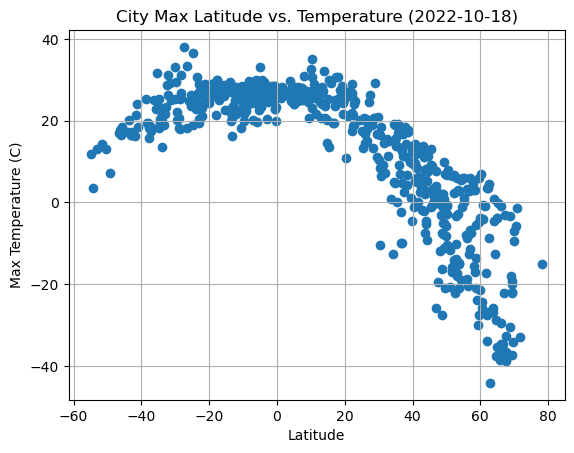

In [76]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

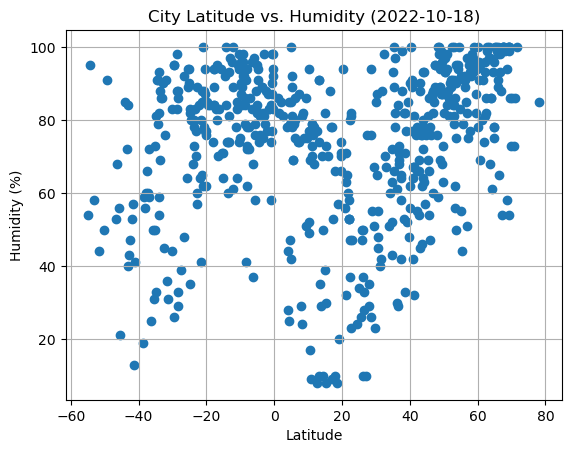

In [77]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

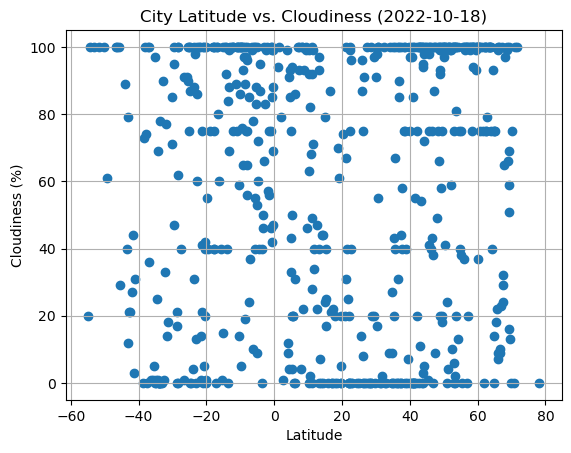

In [78]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

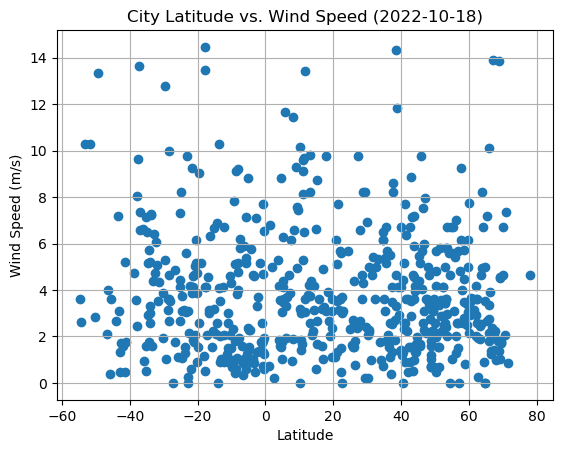

In [79]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [80]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [81]:

# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)


# Create df 

northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ust-nera,64.5667,143.2000,-37.57,93,93,0.91,RU,1707774013
3,jamestown,42.0970,-79.2353,4.73,66,20,0.45,US,1707774001
4,ponta delgada,37.7333,-25.6667,18.44,88,40,8.23,PT,1707774014
5,praia da vitoria,38.7333,-27.0667,17.14,77,40,11.85,PT,1707774014
6,green river,41.5286,-109.4662,0.22,77,55,6.36,US,1707774015


In [100]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bredasdorp,-34.5322,20.0403,19.75,91,25,2.92,ZA,1707774013
2,carnarvon,-24.8667,113.6333,24.12,82,0,8.22,AU,1707774013
7,port-aux-francais,-49.3500,70.2167,7.24,91,61,13.34,TF,1707774015
12,puerto natales,-51.7236,-72.4875,14.25,44,100,10.29,CL,1707774016
14,canada de gomez,-32.8164,-61.3949,23.36,90,90,6.43,AR,1707774016


###  Temperature vs. Latitude Linear Regression Plot

In [83]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

# Get regression values
regress_values = northern_hemi_df["Lat"] * slope + intercept
print(regress_values)

City_ID
1     -15.928813
3       2.504229
4       6.083995
5       5.263644
6       2.970517
         ...    
568     3.568225
569     6.725510
571    -8.975025
572   -14.210669
573    -4.211493
Name: Lat, Length: 367, dtype: float64


In [84]:
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

y = -0.82x +37.04


The r-value is: 0.7438429548719463


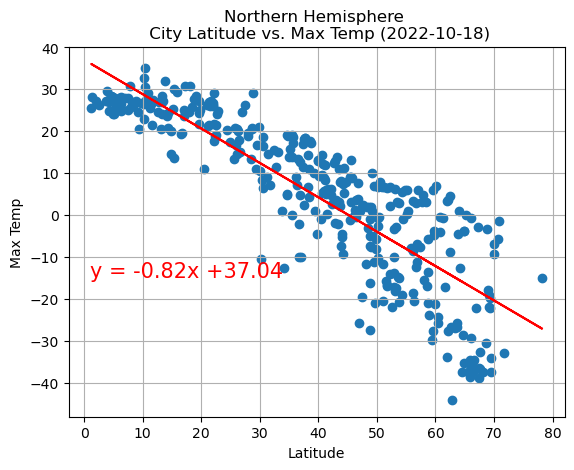

In [85]:
# Linear regression on Northern Hemisphere
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values,"r-")


# Incorporate the other graph properties
plt.title("Northern Hemisphere \n City Latitude vs. Max Temp (2022-10-18)")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq,(1,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [90]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])


# Get regression values
regress_values_south = southern_hemi_df["Lat"] * slope + intercept
print(regress_values_south)

City_ID
0      21.577104
2      23.430427
7      18.735846
12     18.280717
14     21.906102
         ...    
559    28.150588
563    26.281062
566    27.919381
570    27.271758
574    23.101276
Name: Lat, Length: 208, dtype: float64


In [91]:
line_eq_south = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_south)

y = 0.19x +28.2


The r-value is: 0.30015715554996353


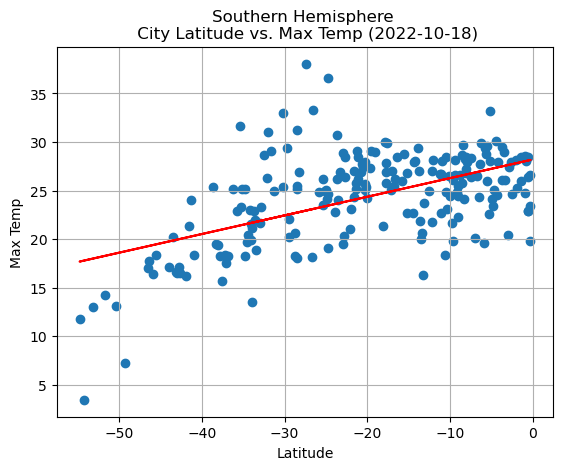

In [92]:
# Linear regression on Southern Hemisphere
plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values_south,"r-")


# Incorporate the other graph properties
plt.title("Southern Hemisphere \n City Latitude vs. Max Temp (2022-10-18)")
plt.ylabel("Max Temp")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_south,(1,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** I can observe from the data that there is a negative correlation in temperature to latitude within the Northern Hemisphere, and a positive one in the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

In [104]:

# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

# Get regression values
regress_values_humid = northern_hemi_df["Lat"] * slope + intercept
print(regress_values_humid)


City_ID
1      86.567621
3      74.522831
4      72.183688
5      72.719734
6      74.218143
         ...    
568    73.827580
569    71.764500
571    82.023774
572    85.444926
573    78.911117
Name: Lat, Length: 367, dtype: float64


In [108]:
line_eq_humid = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_humid)

y = 0.54x +51.96


The r-value is: 0.2157995804360099


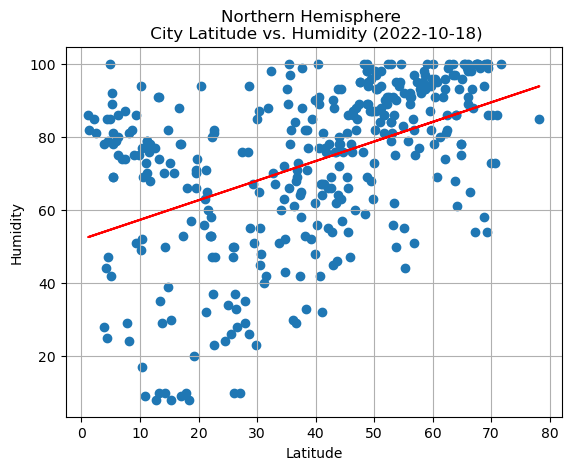

In [109]:
plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values_humid,"r-")

# Incorporate the other graph properties
plt.title("Northern Hemisphere \n City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_humid,(1,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [110]:
# Linear regression on Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

# Get regression values
regress_values_humid_south = southern_hemi_df["Lat"] * slope + intercept
print(regress_values_humid_south)



City_ID
0      66.103742
2      72.286296
7      56.625510
12     55.107233
14     67.201256
         ...    
559    88.032411
563    81.795806
566    87.261119
570    85.100695
574    71.188270
Name: Lat, Length: 208, dtype: float64


In [111]:

line_eq_humid_south = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq_humid_south)

y = 0.64x +88.19


The r-value is: 0.21331166879443977


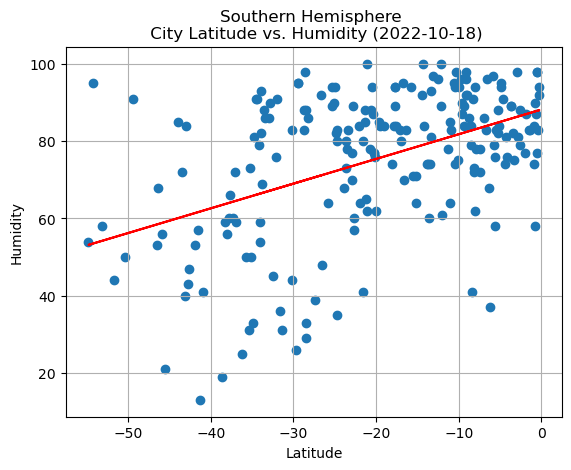

In [112]:


plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values_humid_south,"r-")

# Incorporate the other graph properties
plt.title("Southern Hemisphere \n City Latitude vs. Humidity (2022-10-18)")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_humid_south,(1,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

In [113]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** There seems to be no correlation between the humidity an latidude at either hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.047496109421280366


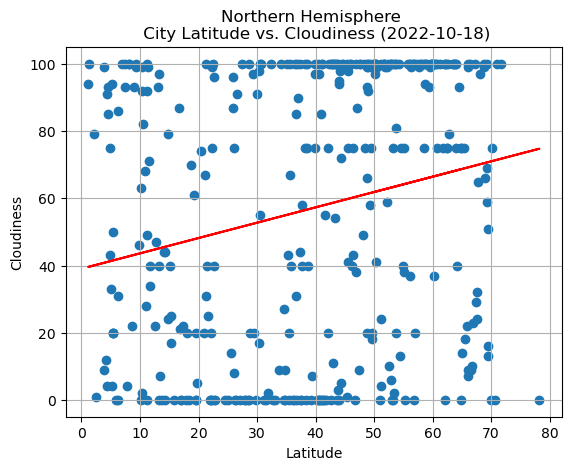

In [118]:
# Linear regression on Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

# Get regression values
regress_values_cloud = northern_hemi_df["Lat"] * slope + intercept
#print(regress_values_cloud)

line_eq_cloud = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq_humid_cloud)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values_cloud,"r-")

# Incorporate the other graph properties
plt.title("Northern Hemisphere \n City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_cloud,(1,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.06540043105465072


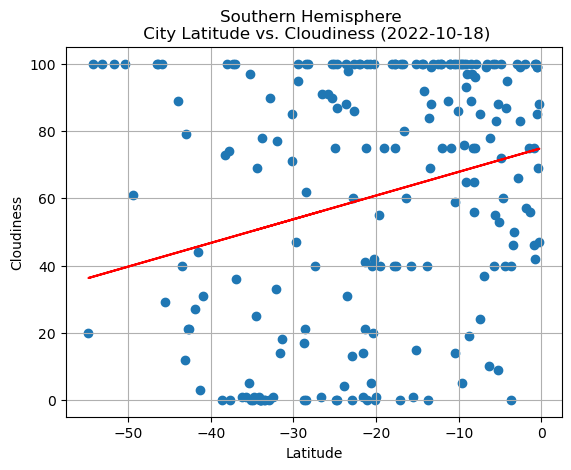

In [119]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

# Get regression values
regress_values_cloud_s = southern_hemi_df["Lat"] * slope + intercept
#print(regress_values_cloud)

line_eq_cloud_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq_humid_cloud)

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values_cloud_s,"r-")

# Incorporate the other graph properties
plt.title("Southern Hemisphere \n City Latitude vs. Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_cloud_s,(1,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There seems to be no correlation between the cloudiness and latidude at either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.012653348282100591


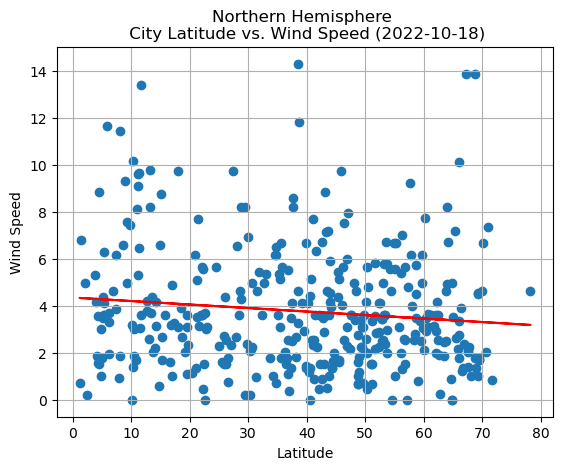

In [121]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

# Get regression values
regress_values_wind = northern_hemi_df["Lat"] * slope + intercept
#print(regress_values_cloud)

line_eq_wind = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
#print(line_eq_humid_cloud)

plt.scatter(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], marker="o")
plt.plot(northern_hemi_df["Lat"],regress_values_wind,"r-")

# Incorporate the other graph properties
plt.title("Northern Hemisphere \n City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_wind,(1,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.042314514526054114


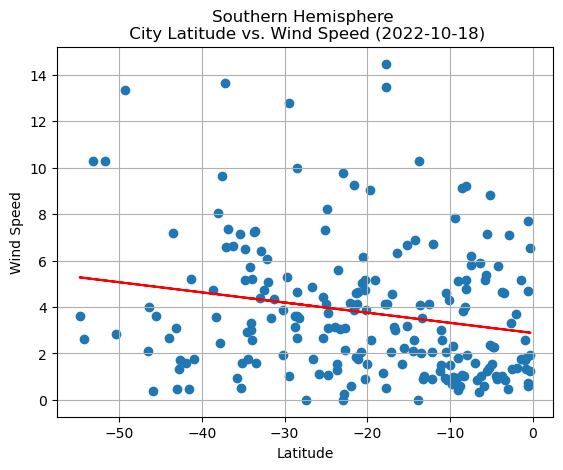

In [123]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

# Get regression values
regress_values_wind_s = southern_hemi_df["Lat"] * slope + intercept

line_eq_wind_s = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], marker="o")
plt.plot(southern_hemi_df["Lat"],regress_values_wind_s,"r-")

# Incorporate the other graph properties
plt.title("Southern Hemisphere \n City Latitude vs. Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)
plt.annotate(line_eq_wind_s,(1,-15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** There does seem to be a negative correlation of latitude to wind speed as the line of best fits ascend to the right. There is to note there are a great number of outliers to each data set. 